In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

In [2]:
# df = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\DRA008156\\2_groups\\clustered_NoNorm\\all_results.tsv', sep='\t')

df = pd.read_csv('/home/oliver/CRConedriveData/maaslin/DRA008156/2_groups/clustered_NoNorm/all_results.tsv', sep='\t') # for linux

**DRA008156**

In [ ]:
df = scale_values(df)

create_heatmap(df, 'DLE Clusters vs. All Features', '../../figures/heatmap_8156_test.png', 'Cancer')

In [ ]:
dl_df = df.loc[df['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Clusters vs. All Features', '../../figures/DL_heatmap_8156_new.png', 'Cancer')

In [ ]:
ldcarb_df = df.loc[df['feature'].str.contains('LD.carb')]

ldcarb_df_scaled = scale_values(ldcarb_df)

create_heatmap(ldcarb_df_scaled, 'DLE Clusters vs. All Features', '../../figures/LDcarb_heatmap_8156_new.png', 'Cancer')

In [ ]:
ddcarb_df = df.loc[df['feature'].str.contains('DD.carb')]

ddcarb_df_scaled = scale_values(ddcarb_df)

create_heatmap(ddcarb_df_scaled, 'DLE Clusters vs. All Features', '../../figures/DDcarb_heatmap_8156_new.png', 'Cancer')

**PRJEB7774**

In [ ]:
df_7774 = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\PRJEB7774\\new_cluster\\no_clr\\all_results.tsv', sep='\t')

print(df_7774.head())

In [ ]:
dl_df = df_7774.loc[df_7774['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Associations in CRC and Adenoma vs. Healthy', '../../figures/DL_heatmap_7774_new.png', 'Carcinoma')

In [ ]:
df_7774 = pd.read_csv('C:\\Users\\odesa\\OneDrive - University of Toronto\\CRC\\maaslin\\PRJEB7774\\new_cluster\\clr\\all_results.tsv', sep='\t')

print(df_7774.head())

In [ ]:
dl_df = df_7774.loc[df_7774['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Associations in CRC and Adenoma vs. Healthy', '../../figures/DL_heatmap_7774_new_clr.png', 'Carcinoma')

**Plotting Bariatric Data**

In [2]:
bariatric = pd.read_csv('E:/bariatric/grouped_bariatric.tsv', sep='\t')

bariatric_metadata = pd.read_csv('E:/bariatric/bariatric_metadata.tsv', sep='\t')

In [3]:
bariatric_metadata['unique_id'] = bariatric_metadata['sample_id'] + '_' + bariatric_metadata['TimePoint']

In [4]:
bariatric['unique_id'] = bariatric_metadata['unique_id']

In [5]:
merged_bariatric = pd.merge(bariatric, bariatric_metadata, on='unique_id')

In [2]:
merged_bariatric = pd.read_csv('/media/oliver/PGH_Backup/bariatric/merged_bariatric.tsv', sep='\t')

In [ ]:
merged_bariatric.head()

In [6]:
# Filter the DataFrame for the DL-endopeptidase enzyme and relevant metadata
df_filtered = merged_bariatric[['sample_id_x', 'TimePoint', 'DL-endopeptidase']].copy()

# Pivot the DataFrame to have one row per patient (sample_id_x) and one column for each TimePoint
df_pivot = df_filtered.pivot(index='sample_id_x', columns='TimePoint', values='DL-endopeptidase')

# Drop any rows with NaN values, which occur if a patient doesn't have all timepoints
df_pivot = df_pivot.dropna()


In [7]:
# Perform the Friedman test
# The Friedman test requires data to be in the form of a 2D array where each row is a block (patient) and each column is a condition (timepoint)
friedman_result = friedmanchisquare(*[df_pivot[col] for col in df_pivot.columns])

print(f"Friedman test statistic: {friedman_result.statistic}, p-value: {friedman_result.pvalue}")

Friedman test statistic: 26.72727272727269, p-value: 6.715617022033378e-06


In [ ]:
# Perform post-hoc analysis if the Friedman test is significant
if friedman_result.pvalue < 0.05:
    # Prepare data for post-hoc analysis
    # Reset index to use in post-hoc analysis
    df_posthoc = df_filtered.dropna().reset_index(drop=True)
    
    # Conduct post-hoc analysis using Conover's test
    post_hoc_results = sp.posthoc_conover(df_posthoc, val_col='DL-endopeptidase', group_col='TimePoint', p_adjust='holm')
    
    print("Post-hoc Conover test results:")
    print(post_hoc_results)
else:
    print("No significant differences found, post-hoc analysis not required.")

In [9]:
# Filter the DataFrame for the DL-endopeptidase enzyme and relevant metadata
df_filtered = merged_bariatric[['sample_id_x', 'TimePoint', 'LD-carboxypeptidase']].copy()

# Pivot the DataFrame to have one row per patient (sample_id_x) and one column for each TimePoint
df_pivot = df_filtered.pivot(index='sample_id_x', columns='TimePoint', values='LD-carboxypeptidase')

# Drop any rows with NaN values, which occur if a patient doesn't have all timepoints
df_pivot = df_pivot.dropna()

In [ ]:
# Perform the Friedman test
# The Friedman test requires data to be in the form of a 2D array where each row is a block (patient) and each column is a condition (timepoint)
friedman_result = friedmanchisquare(*[df_pivot[col] for col in df_pivot.columns])

print(f"Friedman test statistic: {friedman_result.statistic}, p-value: {friedman_result.pvalue}")

# Perform post-hoc analysis if the Friedman test is significant
if friedman_result.pvalue < 0.05:
    # Prepare data for post-hoc analysis
    # Reset index to use in post-hoc analysis
    df_posthoc = df_filtered.dropna().reset_index(drop=True)
    
    # Conduct post-hoc analysis using Conover's test
    post_hoc_results = sp.posthoc_conover(df_posthoc, val_col='LD-carboxypeptidase', group_col='TimePoint', p_adjust='holm')
    
    print("Post-hoc Conover test results:")
    print(post_hoc_results)
else:
    print("No significant differences found, post-hoc analysis not required.")

In [ ]:

enzymes = ['DL-endopeptidase', 'LD-carboxypeptidase', 
           'LD-endopeptidase', 'Glucosaminidase',
           'DD-carboxypeptidase', 'Diadenylate',
           'Amidase', 'Muramidase']

order = ['BL', 'OR', '1M', '6M']  # Define the desired order of the x-axis

for enzyme in enzymes:    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_bariatric, x='TimePoint', y=enzyme, showfliers=False, order=order)
    sns.stripplot(data=merged_bariatric, x='TimePoint', y=enzyme, color='black', alpha=0.5, order=order)

    plt.title(f'Relative Abundances of {enzyme} at Each Timepoint')
    plt.xlabel('Timepoint')
    plt.ylabel('Relative Abundance')
    plt.xticks(rotation=45)  # Ensure timepoint labels are not overlapping
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.show()

**Plotting Clustered ICI Data**

In [21]:
ici = pd.read_csv('/media/oliver/PGH_Backup/ICI/maaslin/PRJNA399742/Maaslin2ResultsNoNorm/all_results.tsv', sep='\t')

In [ ]:
dl_df = ici.loc[ici['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Associations in Responders vs Non-responders in ICI', '../../figures/DL_heatmap_ici_399742.png', 'R')

**PRJEB10878 Data with updated clusters**

In [ ]:
prjeb10878 = pd.read_csv('E:/CRC/PRJEB10878/maaslin/no_clr/all_results.tsv', sep='\t')
print(prjeb10878.head())

In [ ]:
dl_df = prjeb10878.loc[prjeb10878['feature'].str.contains('DL.e')]

dl_df_scaled = scale_values(dl_df)

create_heatmap(dl_df_scaled, 'DLE Associations in CRC vs healthy patients', '../../figures/DL_heatmap_updated_10878.png', 'case')

**Visualizations of domains and secretion across downregulated clusters**

In [4]:
cluster_info = pd.read_csv('plotting_script/data/cluster_info.tsv', sep='\t')

protein_info = pd.read_csv('plotting_script/data/merged_info.tsv', sep='\t')

# display(cluster_info.head())
display(protein_info.head())

,# ID,Genome,Prediction,Uniref,Lineage,Interpro,dl_endopeptidase-foldseek_cluster
0,MGYG000155050_27_22,MGYG000155050,OTHER,A0A3S5AQD8,d__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;...,"['Endopeptidase, NLPC/P60 domain']",A0A1C5WD06
1,MGYG000096674_74_7,MGYG000096674,OTHER,A0A1C6G2Q5,d__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;...,"['Endopeptidase, NLPC/P60 domain']",A0A1C5WD06
2,MGYG000074457_25_259,MGYG000074457,SP,A0A3P1BK63,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,"['Endopeptidase, NLPC/P60 domain', 'SH3-like d...",A0A1V6BVN9
3,MGYG000074457_44_345,MGYG000074457,SP,A0A2S9XVU2,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,"['Endopeptidase, NLPC/P60 domain', 'Bacterial ...",A0A1V5YPB2
4,MGYG000002288_3_33,MGYG000002288,SP,A0A3P1BK63,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,"['Endopeptidase, NLPC/P60 domain', 'SH3-like d...",A0A1V6BVN9


In [7]:
downregulated = ['A0A0B0HUJ2', 'A0A1C5VJV2', 'A0A1C6FAW9', 'A0A1C6G745', 'A0A1Y6AQ80',
                  'A0A6N3BHG0', 'A0A174TDS3', 'A0A829ZMP2', 'R6MIH8', 'R6YTV6']

subset_df = protein_info[protein_info['dl_endopeptidase-foldseek_cluster'].isin(downregulated)]



In [12]:
# First, get total counts per cluster to calculate proportions
total_counts_per_cluster = subset_df.groupby('dl_endopeptidase-foldseek_cluster').size()

# Recalculate domain counts (not proportions) for the adjusted plot
domain_counts_adj = subset_df.groupby(['dl_endopeptidase-foldseek_cluster', 'Interpro']).size().reset_index(name='counts')

# Calculate proportions
domain_counts_adj['proportion'] = domain_counts_adj.apply(lambda row: row['counts'] / total_counts_per_cluster[row['dl_endopeptidase-foldseek_cluster']], axis=1)

# Creating a pivot table for proportions
pivot_table_proportions = domain_counts_adj.pivot(index='dl_endopeptidase-foldseek_cluster', columns='Interpro', values='proportion').fillna(0)

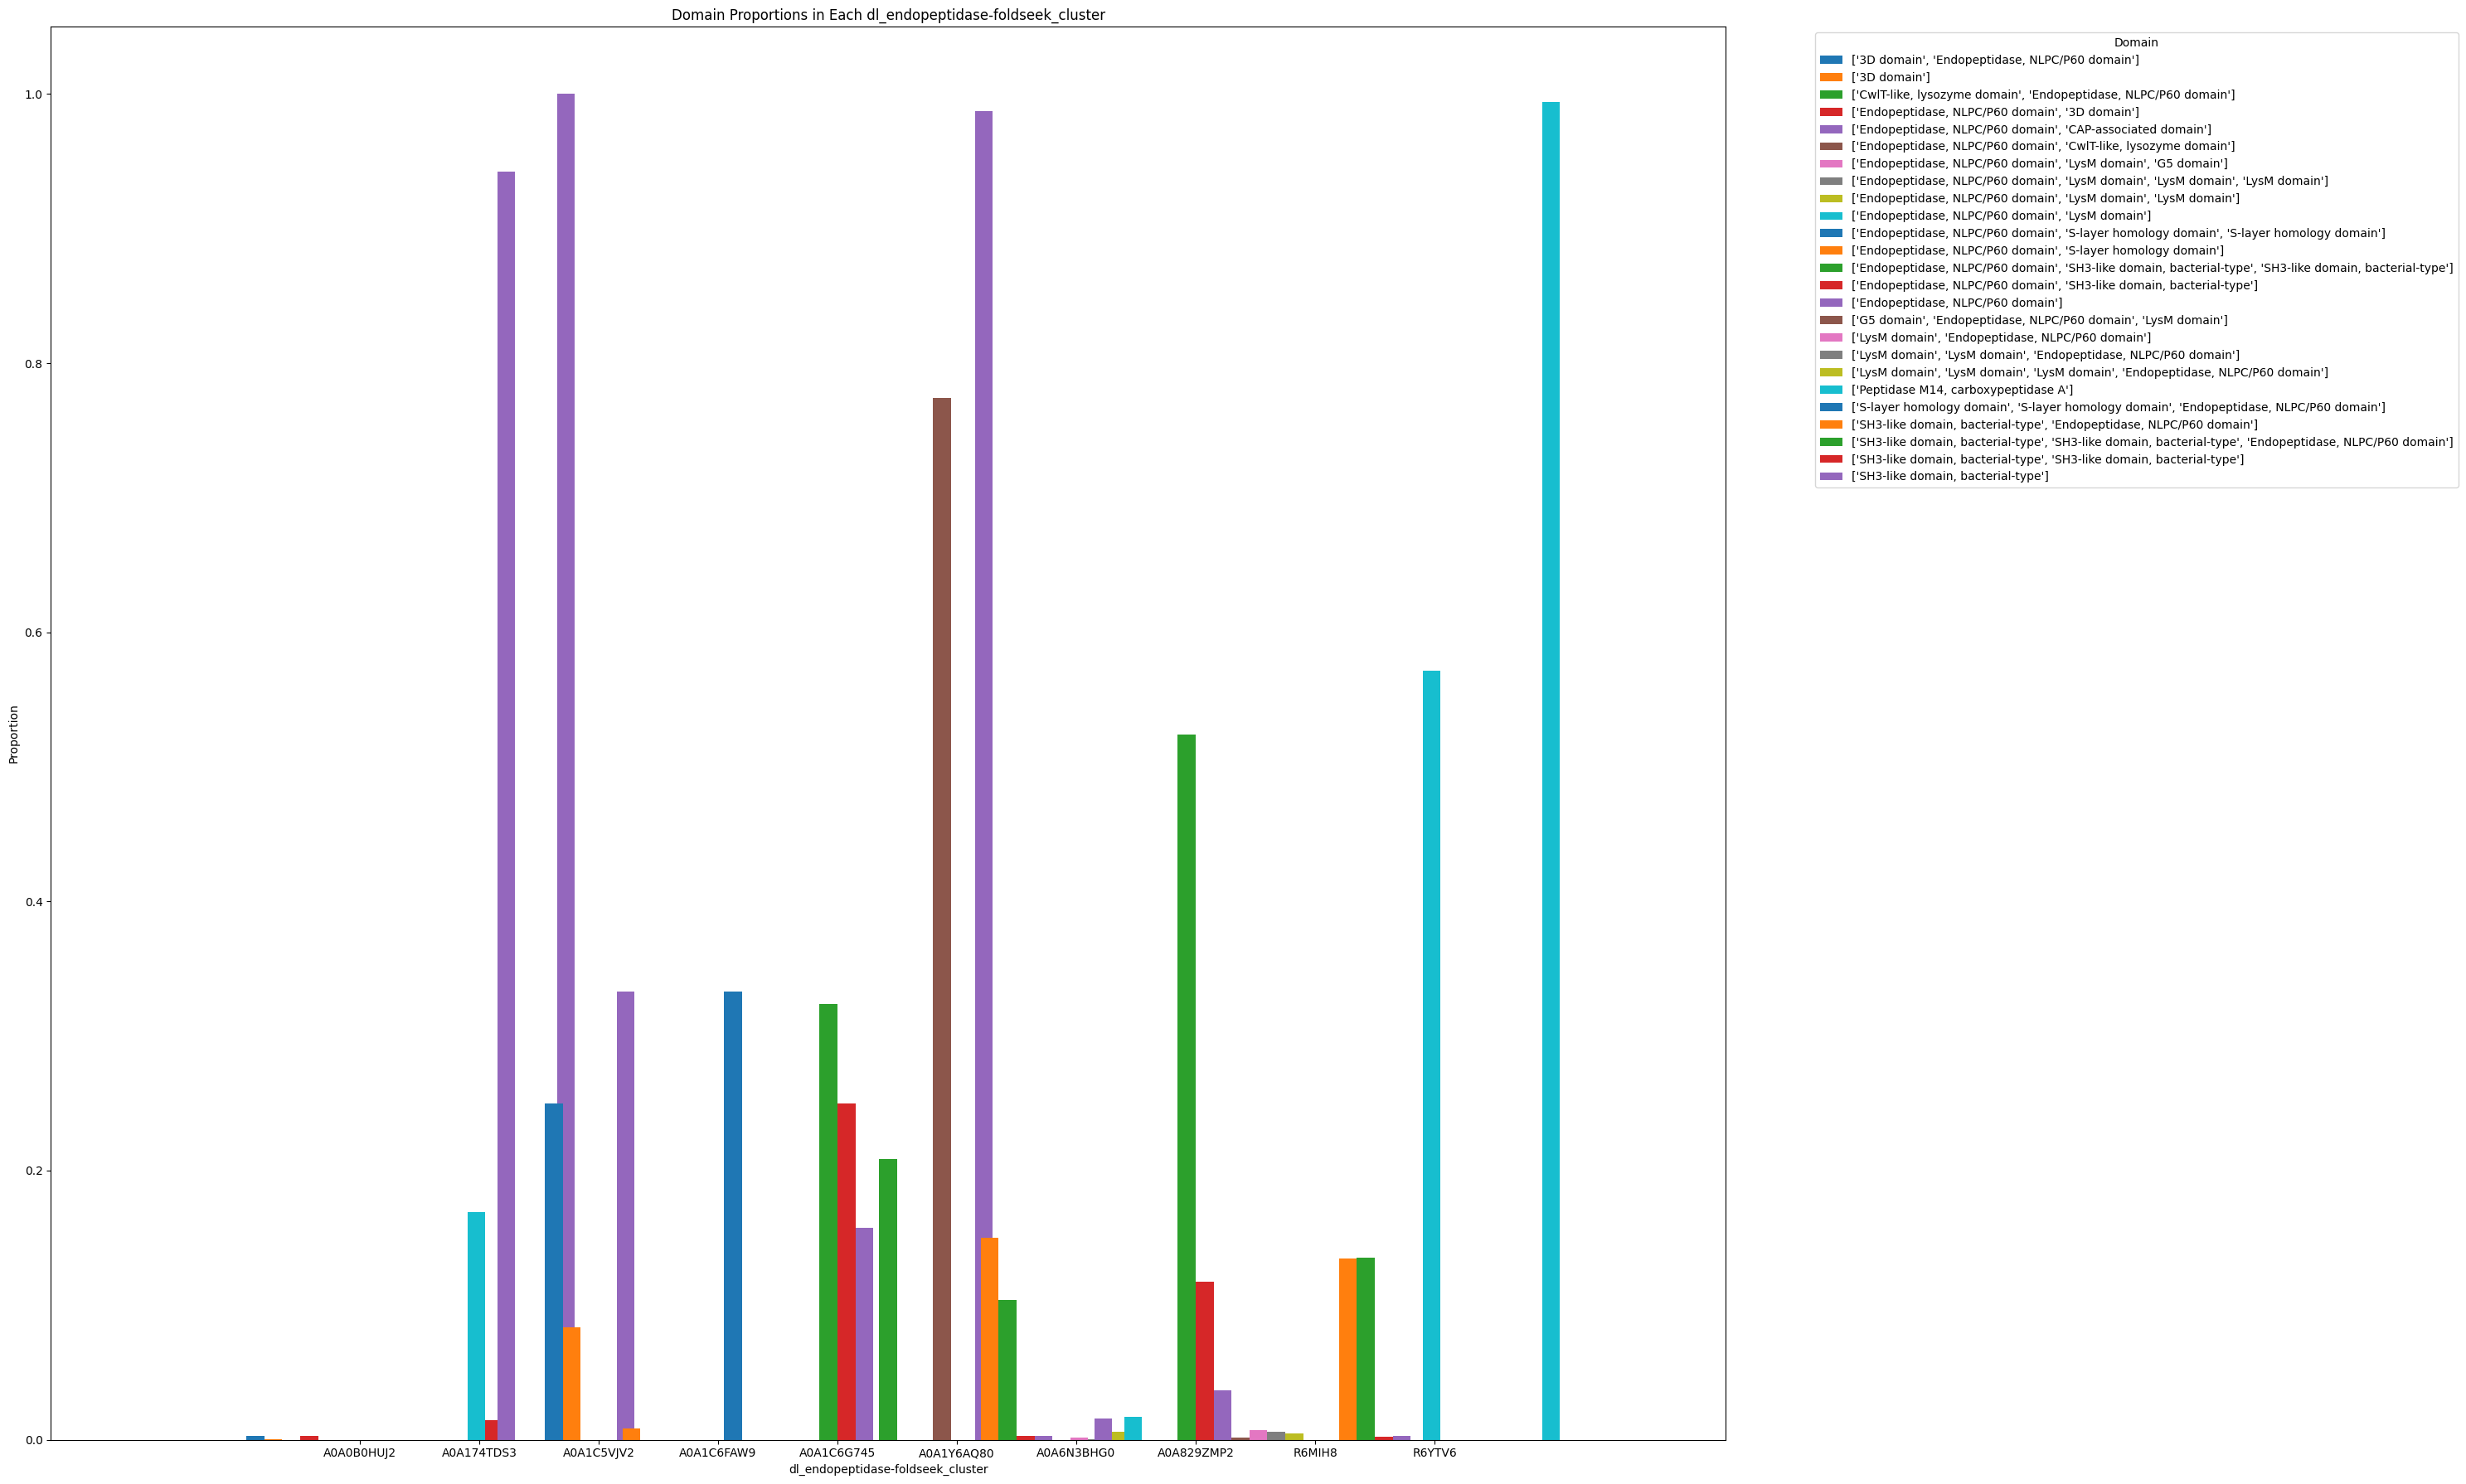